In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [11]:
#Loading the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
#Normalising the data to get the vales in the range [0,1]
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") /255.0

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)

In [14]:
test_datagen = ImageDataGenerator()

In [15]:
#Generating images for training and testing in the model
train_generator = train_datagen.flow(x_train, y_train, batch_size=128)
test_generator = test_datagen.flow(x_test, y_test, batch_size=128)

In [16]:
model = Sequential([
    Conv2D(96, (3, 3), strides=(1, 1), activation='relu', padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4,clipvalue=1.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641,290 (17.71 MB)

 Trainable params: 4,638,538 (17.69 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [22]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8272 - loss: 0.5214 - val_accuracy: 0.7785 - val_loss: 0.6800
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.8324 - loss: 0.5025 - val_accuracy: 0.7445 - val_loss: 0.8060
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.8471 - loss: 0.4684 - val_accuracy: 0.7859 - val_loss: 0.6517
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.8492 - loss: 0.4505 - val_accuracy: 0.8118 - val_loss: 0.5555
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8581 - loss: 0.4340 - val_accuracy: 0.7918 - val_loss: 0.6568
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.8665 - loss: 0.3952 - val_accuracy: 0.7877 - val_loss: 0.6300
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8728 - loss: 0.3869 - val_accuracy: 0.7180 - val_loss: 0.9509
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8710 - loss: 0.3858 -

In [23]:
y_test_labels=np.argmax(y_test,axis=1)
y_pred =np.argmax(model.predict(x_test),axis=1)
print("Classification Report:")
print(classification_report(y_test_labels,y_pred))
print("ConfusionMatrix:")
print(confusion_matrix(y_test_labels,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.88      0.95      0.92      1000
           2       0.70      0.85      0.77      1000
           3       0.78      0.61      0.69      1000
           4       0.79      0.84      0.82      1000
           5       0.87      0.66      0.75      1000
           6       0.75      0.95      0.84      1000
           7       0.93      0.83      0.88      1000
           8       0.95      0.89      0.92      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

ConfusionMatrix:
[[813  24  75   9  11   0  11   3  24  30]
 [  3 953   0   2   1   0   3   0   2  36]
 [ 11   5 854  13  22  14  62   7   1  11]
 [  8  10  90 614  69  66  97  

In [24]:
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.8401
Recall: 0.8330
F1-score: 0.8311


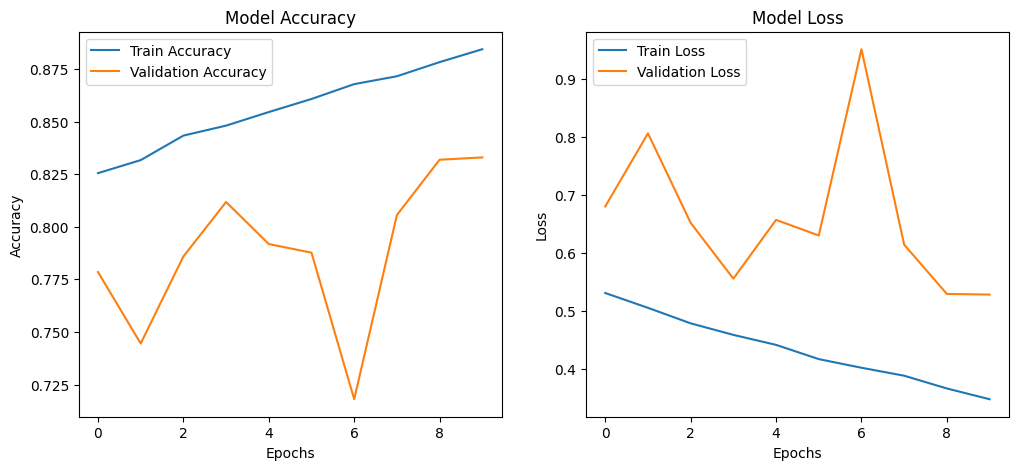

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()